In [14]:
from match import * 
 
PrevTour = None
n = 8
counter = 1
with open("Data.py","w") as f:
    f.write("Data = [ ")

In [ ]:
m = int(pow(2, n))
turnament = Tournament(n - 1) if PrevTour == None else PrevTour
print(turnament)
while True:
    for i in range(50):
        turnament.rank()
        GenData = [   
                    Match(turnament.ranking[i], turnament.ranking[i + 1]).getResult(
                        False
                    )
                    for i in range(0, len(turnament.ranking), 2)
                ]
        GenData = [(x,z) for x,y,z,w in GenData]
        GenData = [x for par in GenData for x in par]
        with open("Data.py", "a") as f:
            f.write(str(GenData) + ", ")
        
        counter += 1
        

        print(counter)
        # print(
        #     Match(turnament.ranking[0], turnament.ranking[1]).getResult(
        #          False
        #     )
        # )
        PrevTour = turnament
        turnament = Tournament(
            reproduce(
                turnament.ranking,
                Keep=m // 2 + m // 32,
                Mixes=m // 16,
                Selections=m // 16,
                SingleMutations=m // 16,
                SlabMutations=m // 32,
                RainMutations=m // 16,
            )
        )

1502
1503
1504
1505
1506
1507
1508
1509
1510
1511
1512
1513
1514
1515
1516
1517
1518
1519
1520
1521
1522
1523
1524
1525
1526
1527
1528
1529
1530
1531
1532
1533
1534
1535
1536
1537
1538
1539
1540
1541
1542
1543
1544
1545
1546
1547
1548
1549
1550
1551
1552
1553
1554
1555
1556
1557
1558
1559
1560
1561
1562
1563
1564
1565
1566
1567
1568
1569
1570
1571
1572
1573
1574
1575
1576
1577
1578
1579
1580
1581
1582
1583
1584
1585
1586
1587
1588
1589
1590
1591
1592
1593
1594
1595
1596
1597
1598
1599
1600
1601
1602
1603
1604
1605
1606
1607
1608
1609
1610
1611
1612
1613
1614
1615
1616
1617
1618
1619
1620
1621
1622
1623
1624
1625
1626
1627
1628
1629
1630
1631
1632
1633
1634
1635
1636
1637
1638
1639
1640
1641
1642
1643
1644
1645
1646
1647
1648
1649
1650
1651
1652
1653
1654
1655
1656
1657
1658
1659
1660
1661
1662
1663
1664
1665
1666
1667
1668
1669
1670
1671
1672
1673
1674
1675
1676
1677
1678
1679
1680
1681
1682
1683
1684
1685
1686
1687
1688
1689
1690
1691
1692
1693
1694
1695
1696
1697
1698
1699
1700
1701


In [17]:
print(PrevTour)
print(counter)

1501


In [18]:
with open("Data.py", "a") as f:
            f.write("]")

In [27]:
import Data 
import importlib
importlib.reload(Data)

 
Max = [max([val for val in gen]) for gen in Data.Data]
Avg = [sum([val for val in gen])/len(gen) for gen in Data.Data]
print(Data.Data)
print("Max : ",Max)
print("Avg : ",Avg)




[[-17, -26, -31, -31, -15, -17, -5, -10, -30, -31, -12, -15, -35, -31, -27, -15, -36, -32, -5, -9, -22, -26, -26, -35, -15, -21, -40, -30, -22, -27, -15, -16, -36, -32, -47, -32, -22, -26, -26, -35, -15, -21, -40, -30, -22, -27, -15, -16, -15, -21, -38, -35, -23, -27, -5, -10, -30, -31, -22, -26, -34, -32, -19, -19, -36, -32, -31, -31, -23, -27, -5, -10, -30, -31, -12, -15, -35, -31, -27, -15, -36, -32, -5, -9, -22, -26, -26, -35, -30, -31, -22, -26, -22, -27, -8, -9, -36, -32, -5, -9, -22, -26, -26, -35, -15, -21, -40, -30, -22, -20, -19, -19, -15, -21, -40, -30, -13, -17, -5, -10, -16, -22, -22, -26, -34, -32, -19, -19, -36, -32, -31, -31, -23, -27, -5, -10, -30, -31, -12, -15, -35, -31, -27, -15, -36, -32, -5, -9, -22, -26, -26, -35, -30, -31, -22, -26, -22, -27, -8, -9, -36, -32, -5, -9, -22, -26, -26, -35, -15, -21, -40, -30, -22, -27, -15, -16, -15, -21, -38, -35, -23, -27, -5, -10, -30, -31, -22, -26, -34, -32, -19, -19, -36, -32, -47, -32, -22, -26, -26, -35, -15, -21, -40, -30

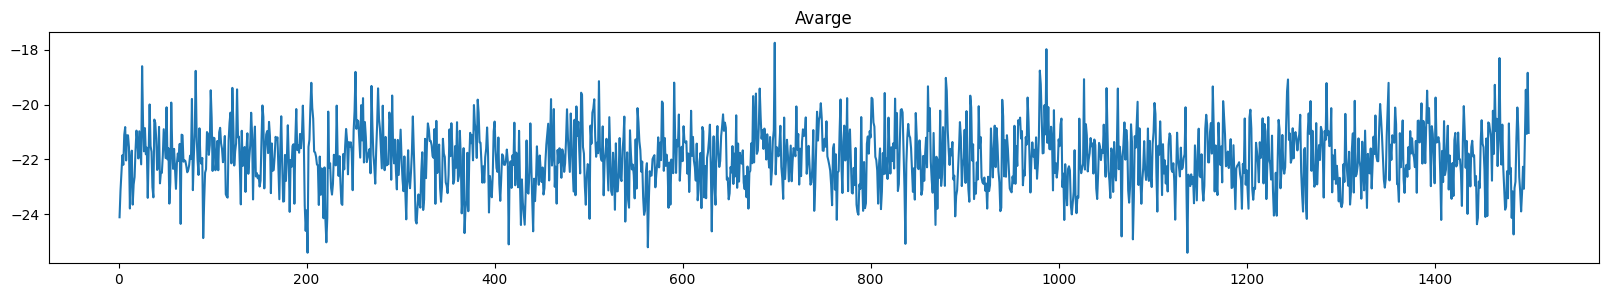

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))

plt.plot(list(range(1,len(Avg)+1)), Avg)
plt.title( "Avarge")
plt.savefig('Avrage.png',dpi=600)


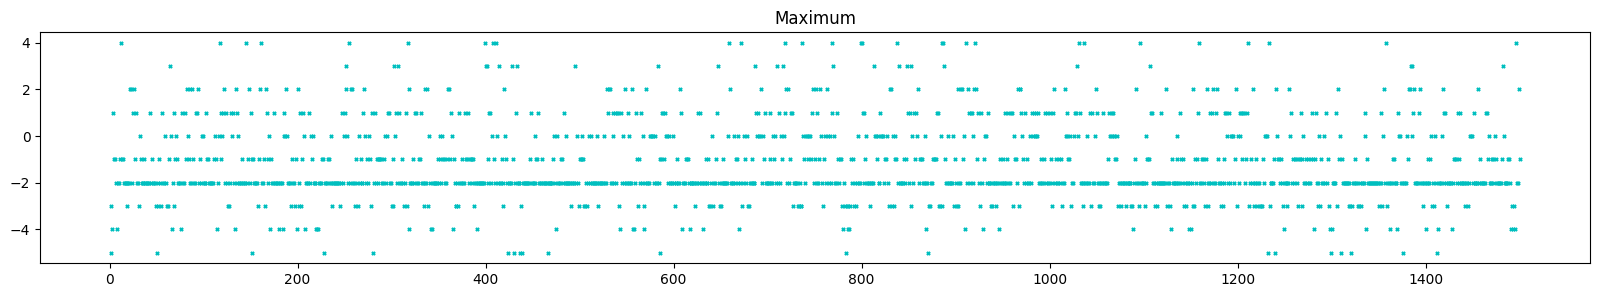

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,3))
 
plt.scatter(list(range(1,len(Max)+1)), Max,color="c", s=5, marker="x")
plt.title( "Maximum")
plt.savefig('Max.png',dpi=600)